<a href="https://colab.research.google.com/github/AdamAnderB/Bramlett_DSPN_S24/blob/main/book/exercises/techniques-for-data-cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Data cleansing

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data.

In [19]:
# INSERT CODE HERE
# If you are running this on your local computer, wet your workign directory to
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer.
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/lexDat")

# If you are running this on Colab, then use something like this.
# system("gdown --id 1wSvRPME5NimUDa0t3WqNSGzimLB1uNa7")
url <- "https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/master/Homework%20datasets/lexDat/LexicalData_toclean.csv"
file <- "LexicalData_toclean.csv"
download.file(url, file)
data<-read.csv("LexicalData_toclean.csv")
library(tidyverse)

The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. Data Cleansing (4 points)

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive.

Write code that will copy the data to a new variable and make the above changes.

In [38]:
# INSERT CODE HERE
data<-data%>%
  mutate(across(where(is.character), ~gsub(",", "", .)))%>%
  mutate(D_RT=as.numeric(D_RT))%>%
  filter(!is.na(D_RT) & D_RT != "")%>%
  filter(D_RT>0)

For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing.

> *Write your response here.*
> * First action: lexical error: the number format is in just not appropriate for the numeric conversion. The extra commas are only useful for human readability not for numeric data types.
> * Second action: converage anomaly (missing value): the values are just missing and the row should be removed (although none were)
> * Third action: semantic anomoly (Integrity constraint violations): it doesn't make sense to have reaction times less than 0.

---
## 3. Data Manipulation with Tidyverse (4 points)

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells.

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [39]:
# INSERT CODE HERE
data_sum<-data%>%
  summarize(obs=n(),mean_rt=mean(D_RT),sd_rt=sd(D_RT))
data_sum

obs,mean_rt,sd_rt
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one.

In [40]:
# INSERT CODE HERE
data<-data%>%
  mutate(new_trial=Trial-1)

---
## 4. Plotting Data (1 point)

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

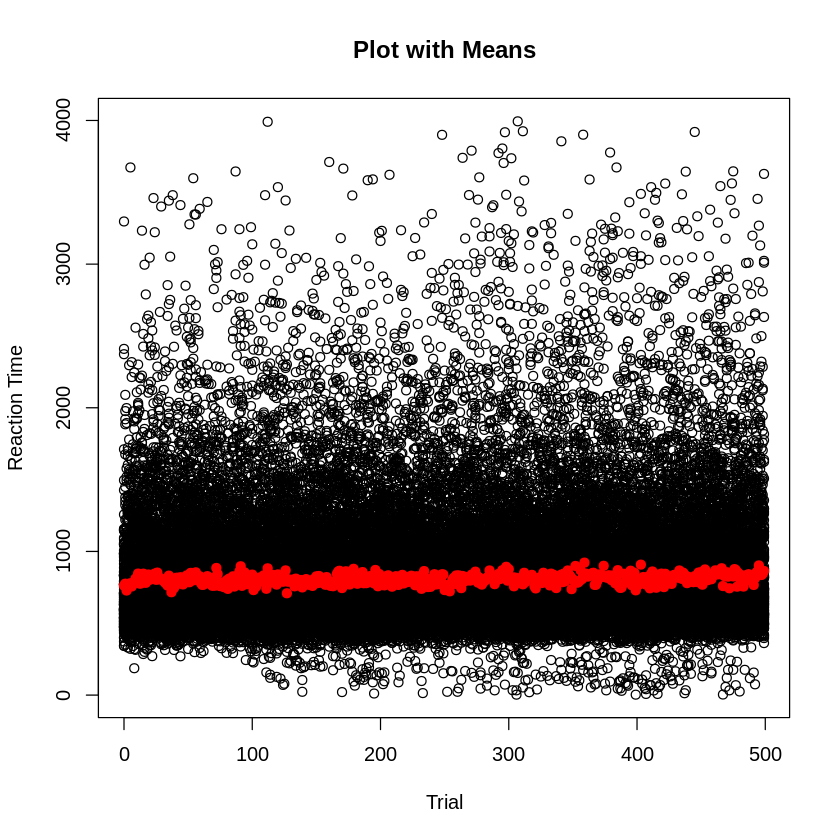

In [49]:
# INSERT CODE HERE
#basic plot
#plot(data$new_trial,data$D_RT)

#make means
means <- aggregate(D_RT ~ new_trial, data = data, FUN = mean, na.rm = TRUE)
#base plot
plot(data$new_trial, data$D_RT, xlab = "Trial", ylab = "Reaction Time", main = "Plot with Means")
#put means on plot
points(means$new_trial, means$D_RT, col = "red", pch = 19)

That's all for this assignment! When you are finished, save the notebook as Exercise4.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 12, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Not this time*